In [426]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1.

In [428]:
def sum_prod(X, V):
    # Создаем нулевой вектор для результата
    res = np.zeros_like(V[0])  
    # Перемножаем матрицы с соответствующими векторами и складываем
    for a, b in zip(X, V):
        res += np.dot(a, b)  # Добавляем к результату
    return res

def test():
    # Тест 1: Матрицы 3*3
    X1 = np.array([[14, 8, 3], [8, 5, 2], [3, 2, 1]])
    X2 = np.array([[14, 8, 3], [8, 5, 2], [3, 2, 1]])
    V1 = np.array([[2], [0], [19]])
    V2 = np.array([[2], [0], [19]])
    X = [X1, X2]
    V = [V1, V2]
    expected_result = np.array([[170], [108], [50]])
    result = sum_prod(X, V)
    assert np.array_equal(result, expected_result), f"Test 1 Failed. Expected {expected_result}, got {result}"
    print("Test 1 passed.")

    # Тест 2: Матрицы 2*2
    X1 = np.array([[7, 3], [4, 2]])
    X2 = np.array([[8, 2], [7, 3]])
    V1 = np.array([[1], [2]])
    V2 = np.array([[3], [1]])
    X = [X1, X2]
    V = [V1, V2]
    expected_result = np.array([[39], [32]])
    result = sum_prod(X, V)
    assert np.array_equal(result, expected_result), f"Test 2 Failed. Expected {expected_result}, got {result}"
    print("Test 2 passed.")
    
    # Тест 3: Матрицы лишь с нулями и единицами
    X1 = np.eye(3, dtype=int)
    X2 = np.eye(3, dtype=int)
    V1 = np.array([[2], [2], [2]])
    V2 = np.array([[3], [3], [3]])
    X = [X1, X2]
    V = [V1, V2]
    expected_result = np.array([[5], [5], [5]])
    result = sum_prod(X, V)
    assert np.array_equal(result, expected_result), f"Test 3 Failed. Expected {expected_result}, got {result}"
    print("Test 3 passed.")

test()

Test 1 passed.
Test 2 passed.
Test 3 passed.


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [430]:
def binarize(M, threshold=0.5):
    # Применяем условие и преобразуем булевые значения в целые (0 и 1)
    return (M > threshold).astype(int)

def test():
    # Тест 1: Простая матрица
    M = np.array([[0.14, 0.7], [0.324, 0.9]])
    threshold = 0.5
    expected_result = np.array([[0, 1], [0, 1]])
    result = binarize(M, threshold)
    assert np.array_equal(result, expected_result), f"Test 1 Failed. Expected {expected_result}, got {result}"
    print("Test 1 passed.")
    
    # Тест 2: Матрица с отрицательными значениями и другими порогами
    M = np.array([[0.19, -0.54, 0.5], [2.0, -0.5, 0.76]])
    threshold = 0.22
    expected_result = np.array([[0, 0, 1], [1, 0, 1]])
    result = binarize(M, threshold)
    assert np.array_equal(result, expected_result), f"Test 2 Failed. Expected {expected_result}, got {result}"
    print("Test 2 passed.")
    
    # Тест 3: Тестирование с порогом 0
    M = np.array([[0, -6, 4], [7, 7, -9]])
    threshold = 0
    expected_result = np.array([[0, 0, 1], [1, 1, 0]])
    result = binarize(M, threshold)
    assert np.array_equal(result, expected_result), f"Test 3 Failed. Expected {expected_result}, got {result}"
    print("Test 3 passed.")
    
    # Тест 4: Тестирование с отрицательным порогом
    M = np.array([[3, -5, -1], [-3, 2, 0]])
    threshold = -1
    expected_result = np.array([[1, 0, 0], [0, 1, 1]])
    result = binarize(M, threshold)
    assert np.array_equal(result, expected_result), f"Test 4 Failed. Expected {expected_result}, got {result}"
    print("Test 4 passed.")
    
test()

Test 1 passed.
Test 2 passed.
Test 3 passed.
Test 4 passed.


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [432]:
def unique_rows(mat): # СПИСКИ!
    return [np.unique(row) for row in mat]

def unique_columns(mat): # СТОЛБЦЫ!
    return [np.unique(col) for col in mat.T]

def test():
    # Тест 1
    mat = np.array([[4, 7, 3, 3], [2, -7, 4, 5]])
    expected_rows = [np.array([3, 4, 7]), np.array([-7, 2, 4, 5])] # Указывать по возрастанию!
    expected_cols = [np.array([2, 4]), np.array([-7, 7]), np.array([3, 4]), np.array([3, 5])]
    result_rows = unique_rows(mat)
    result_cols = unique_columns(mat)
    for i, res in enumerate(result_rows):
        assert np.array_equal(res, expected_rows[i]), f"Test 1 Rows Faile for row {i}. Expected {expected_rows[i]}, got {res}"
    for i, res in enumerate(result_cols):
        assert np.array_equal(res, expected_cols[i]), f"Test 1 Columns Failed for column {i}. Expected {expected_cols[i]}, got {res}"
    print("Test 1 passed.")
    
    # Тест 2
    mat = np.array([[7, 7.13144], [7, 7.13145]])
    expected_rows = [np.array([7, 7.13144]), np.array([7, 7.13145])]
    expected_cols = [np.array([7]), np.array([7.13144, 7.13145])]
    result_rows = unique_rows(mat)
    result_cols = unique_columns(mat)
    for i, res in enumerate(result_rows):
        assert np.array_equal(res, expected_rows[i]), f"Test 2 Rows Failed for row {i}. Expected {expected_rows[i]}, got {res}"
    for i, res in enumerate(result_cols):
        assert np.array_equal(res, expected_cols[i]), f"Test 2 Columns Failed for column {i}. Expected {expected_cols[i]}, got {res}"
    print("Test 2 passed.")

test()

Test 1 passed.
Test 2 passed.


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матрица:
 [[ 0.35859302 -0.42485731 -0.01304359]
 [-0.85703681 -0.52478352  0.30369904]
 [ 0.90665094 -0.70283787 -0.75890866]
 [-0.39184719  0.29407176 -0.01398282]
 [ 0.31766822 -1.1224613   1.03656425]]

Математическое ожидание по строкам:
 [-0.02643596 -0.35937376 -0.18503186 -0.03725275  0.07725705]
Дисперсия по строкам:
 [0.10238875 0.23823148 0.59640966 0.07868488 0.80579732]

Математическое ожидание по столбцам:
 [ 0.06680564 -0.49617365  0.11086564]
Дисперсия по столбцам:
 [0.38345186 0.21306774 0.33631012]


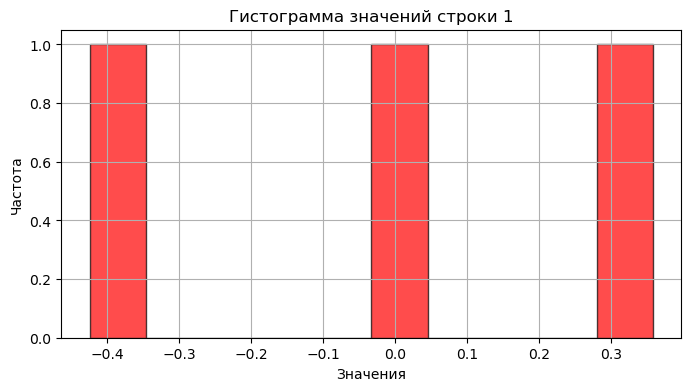

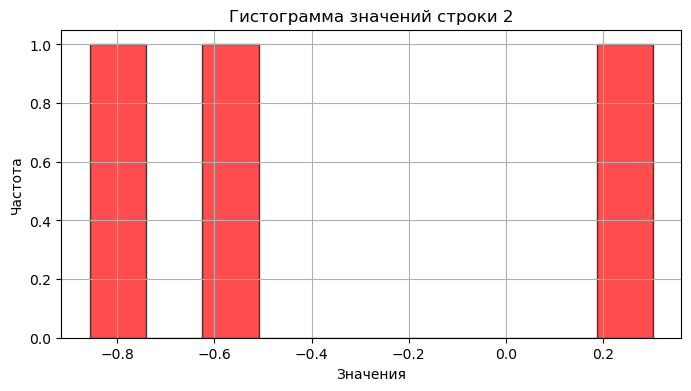

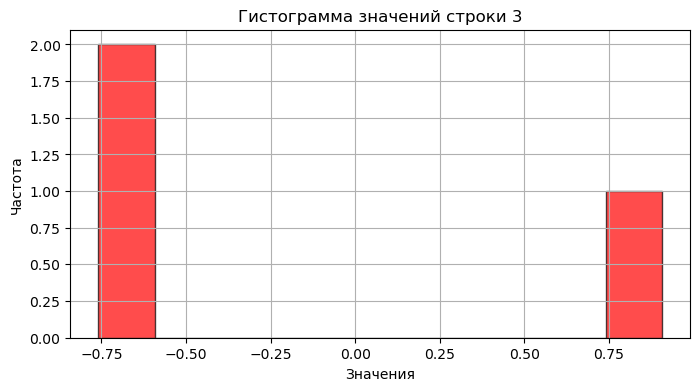

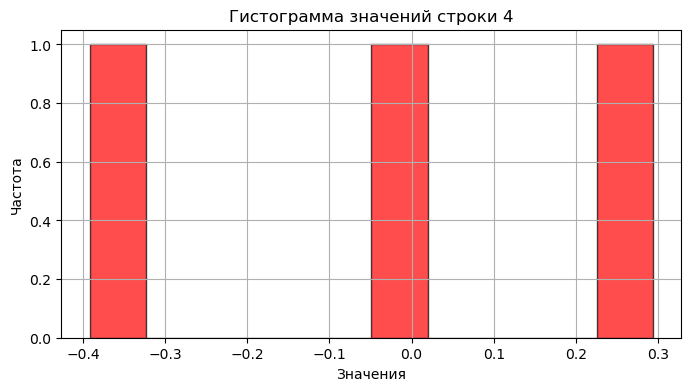

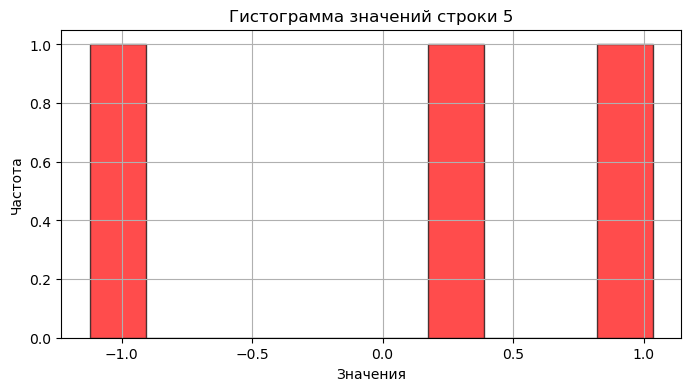

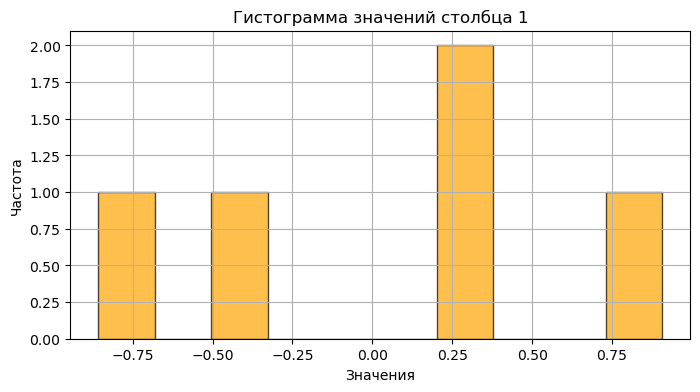

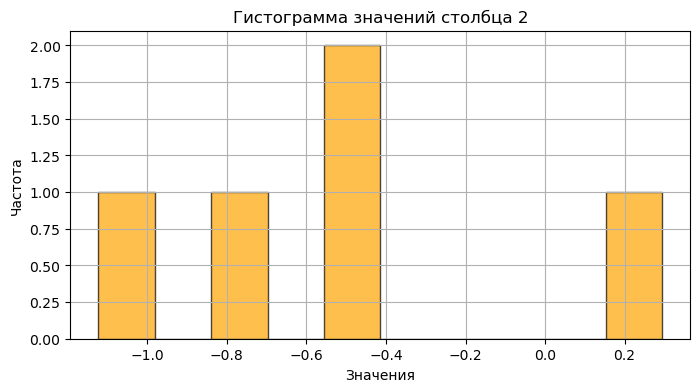

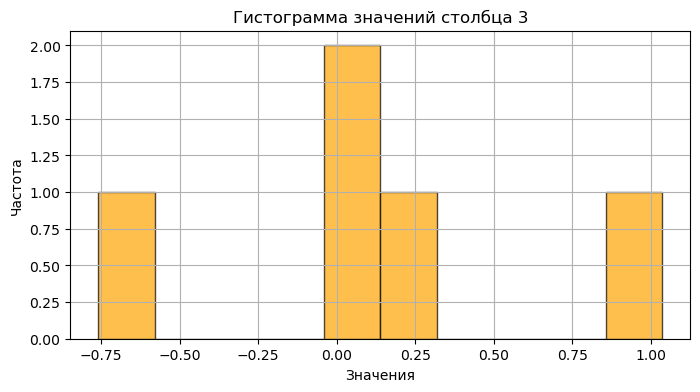

In [434]:
def generate_matrix(m, n):
    # Генерация матрицы
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    
    # Вычисление математического ожидания и дисперсии
    mean_rows = np.mean(matrix, axis=1)
    variance_rows = np.var(matrix, axis=1)
    mean_columns = np.mean(matrix, axis=0)
    variance_columns = np.var(matrix, axis=0)

    print("Матрица:\n", matrix)
    print("\nМатематическое ожидание по строкам:\n", mean_rows)
    print("Дисперсия по строкам:\n", variance_rows)
    print("\nМатематическое ожидание по столбцам:\n", mean_columns)
    print("Дисперсия по столбцам:\n", variance_columns)

    # Гистограммы для строк
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[i], bins=10, alpha=0.7, color='red', edgecolor='black')
        plt.title(f'Гистограмма значений строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

    # Гистограммы для столбцов
    for j in range(n):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='orange', edgecolor='black')
        plt.title(f'Гистограмма значений столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

generate_matrix(5, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [436]:
def chess(m, n, a, b):
    # Матрица m x n с нулями
    M = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            # Смотрим четность/нечетность индексов
            if (i + j) % 2 == 0:
                M[i, j] = a
            else:
                M[i, j] = b
    return M

def test():
    # Тест 1: Матрица 1*3
    res = chess(1, 3, 0, 3)
    expected_res = np.array([[0, 3, 0]])
    assert np.array_equal(res, expected_res), f"Test 1 Failed: {res}"
    print("Test 1 passed.")
    
    # Тест 2: Матрица 3*3
    res = chess(3, 3, 100, 0)
    expected_res = np.array([[100, 0, 100], 
                            [0, 100, 0], 
                            [100, 0, 100]])
    assert np.array_equal(res, expected_res), f"Test 2 Failed: {res}"
    print("Test 2 passed.")
    
    # Тест 3: Матрица 4*5
    res = chess(4, 5, -2, 11)
    expected_res = np.array([[-2, 11, -2, 11, -2], 
                            [11, -2, 11, -2, 11], 
                            [-2, 11, -2, 11, -2], 
                            [11, -2, 11, -2, 11]])
    assert np.array_equal(res, expected_res), f"Test 3 Failed: {res}"
    print("Test 3 passed.")

test()

Test 1 passed.
Test 2 passed.
Test 3 passed.


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

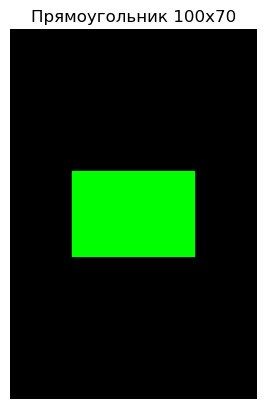

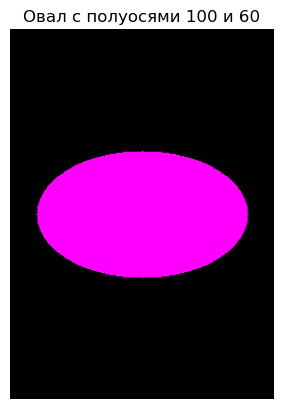

In [438]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Фон
    image = np.ones((n, m, 3), dtype=np.uint8)
    image[:, :] = background_color

    # Определяем координаты прямоугольника
    x0 = (m - a) // 2  # Координаты верхнего левого угла
    y0 = (n - b) // 2

    # Заполняем прямоугольник заданным цветом
    image[y0:y0+b, x0:x0+a] = rectangle_color

    # Отрисовываем все
    plt.imshow(image)
    plt.title(f"Прямоугольник {a}x{b}")
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Фон
    image = np.ones((n, m, 3), dtype=np.uint8)
    image[:, :] = background_color

    # Центр овала
    x0 = m // 2
    y0 = n // 2

    # Заполняем пиксели овала цветом
    for x in range(m):
        for y in range(n):
            # Проверяем уравнение эллипса
            if ((x - x0) ** 2) / a ** 2 + ((y - y0) ** 2) / b ** 2 <= 1:
                image[y, x] = ellipse_color

    # Отрисовываем все
    plt.imshow(image)
    plt.title(f"Овал с полуосями {a} и {b}")
    plt.axis('off')
    plt.show()

def test_rectangle():
    draw_rectangle(100, 70, 200, 300, (0, 255, 0), (0, 0, 0))

def test_ellipse():
    draw_ellipse(100, 60, 250, 350, (255, 0, 255), (0, 0, 0))

test_rectangle()
test_ellipse()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [440]:
def get_info_ts(ts, p):
    mean = np.mean(ts)
    var_d = np.var(ts)
    std_dev = np.std(ts)
    max = []
    min = []
    for i in range(1, len(ts) - 1):
        if data[i] > ts[i - 1] and ts[i] > ts[i + 1]:
            max.append(ts[i])
        elif data[i] < ts[i - 1] and ts[i] < ts[i + 1]:
            min.append(ts[i])
    # Скользящее среднее
    average = []
    for i in range(len(ts) - p + 1):
        window = ts[i:i + p]
        average.append(np.mean(window))
    return {
        "mean": mean,
        "var_d": var_d,
        "std_dev": std_dev,
        "max": max,
        "min": min,
        "average": average
            }

data = [0, 3, 4, 0, 1, 2, -1, 0]
p = 3
result = get_info_ts(data, p)
print("Математическое ожидание:", result["mean"])
print("Дисперсия:", result["var_d"])
print("Стандартное отклонение:", result["std_dev"])
print("Локальные максимумы:", result["max"])
print("Локальные минимумы:", result["min"])
print("Скользящее среднее:", result["average"])

Математическое ожидание: 1.125
Дисперсия: 2.609375
Стандартное отклонение: 1.6153559979150107
Локальные максимумы: [4, 2]
Локальные минимумы: [0, -1]
Скользящее среднее: [2.3333333333333335, 2.3333333333333335, 1.6666666666666667, 1.0, 0.6666666666666666, 0.3333333333333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [442]:
def one_hot_encoding(v):
    n = max(v) + 1
    res = [[0] * n for _ in range(len(v))]
    for i, v in enumerate(v):
        res[i][v] = 1
    return res
    
def test():
    result = one_hot_encoding([0, 2, 3, 0])
    expected = [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
    assert result == expected, "Test Failed"
    print("Test passed.")

test()

Test passed.
